Text(0.03, 0.03, '$P[M_P]$=64.7%')

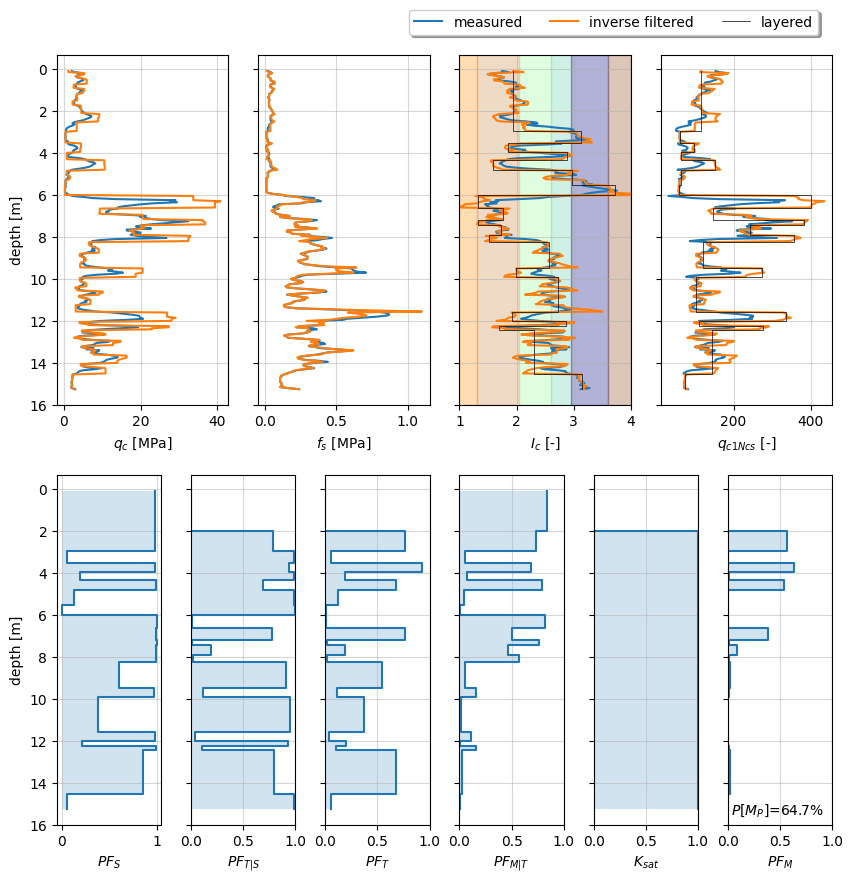

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import smt

def interleave(v1, v2):
    vout = np.empty(2 * len(v1), dtype=float)
    vout[0::2] = v1
    vout[1::2] = v2
    return vout 
    
# Ready example CPT file and extract data into Numpy arrays
df = pd.read_csv('example_cpt.csv')
depth = df['depth'].values
qt = df['qt'].values
fs = df['fs'].values

# Define earthquake loading conditions
amax = 0.3
m = 7.0
gamma = 19
dGWT = 2.0

Ic, qt_inv, fs_inv, qc1Ncs_inv, Ic_inv, FC, qc1Ncs, \
ztop, zbot, qc1Ncs_lay, Ic_lay, Ksat_lay, \
pfs, pfts, pft, pfmt, pfm, pmp = smt.smt_model(depth, qt, fs, amax, m, dGWT=dGWT, gamma=gamma)

fig = plt.figure(figsize=(10,10))

gs = GridSpec(2, 12, figure=fig, wspace=0.8)
ax = []
ax.append(fig.add_subplot(gs[0, 0:3]))
ax.append(fig.add_subplot(gs[0, 3:6], sharey=ax[0]))
ax.append(fig.add_subplot(gs[0, 6:9], sharey=ax[0]))
ax.append(fig.add_subplot(gs[0, 9:12], sharey=ax[0]))

ax.append(fig.add_subplot(gs[1, 0:2], sharey=ax[0]))
ax.append(fig.add_subplot(gs[1, 2:4], sharey=ax[0]))
ax.append(fig.add_subplot(gs[1, 4:6], sharey=ax[0]))
ax.append(fig.add_subplot(gs[1, 6:8], sharey=ax[0]))
ax.append(fig.add_subplot(gs[1, 8:10], sharey=ax[0]))
ax.append(fig.add_subplot(gs[1, 10:12], sharey=ax[0]))

for i, a in enumerate(ax):
    if((i!=0) and (i!=4)):
        plt.setp(ax[i].get_yticklabels(), visible=False)

ax[0].plot(qt/1000, depth)
ax[0].plot(qt_inv/1000, depth)
ax[1].plot(fs/1000, depth)
ax[1].plot(fs_inv/1000, depth)
ax[2].plot(Ic, depth, label='measured')
ax[2].plot(Ic_inv, depth, label='inverse filtered')
ax[3].plot(qc1Ncs, depth)
ax[3].plot(qc1Ncs_inv, depth)
ax[4].plot(interleave(pfs, pfs), interleave(ztop,zbot))
ax[4].fill_betweenx(interleave(ztop, zbot), np.zeros(2*len(ztop)), interleave(pfs, pfs), facecolor='C0', alpha=0.2)
ax[5].plot(interleave(pfts, pfts), interleave(ztop,zbot))
ax[5].fill_betweenx(interleave(ztop, zbot), np.zeros(2*len(ztop)), interleave(pfts, pfts), facecolor='C0', alpha=0.2)
ax[6].plot(interleave(pft, pft), interleave(ztop,zbot))
ax[6].fill_betweenx(interleave(ztop, zbot), np.zeros(2*len(ztop)), interleave(pft, pft), facecolor='C0', alpha=0.2)
ax[7].plot(interleave(pfmt, pfmt), interleave(ztop,zbot))
ax[7].fill_betweenx(interleave(ztop, zbot), np.zeros(2*len(ztop)), interleave(pfmt, pfmt), facecolor='C0', alpha=0.2)
ax[8].plot(interleave(Ksat_lay, Ksat_lay), interleave(ztop,zbot))
ax[8].fill_betweenx(interleave(ztop, zbot), np.zeros(2*len(ztop)), interleave(Ksat_lay, Ksat_lay), facecolor='C0', alpha=0.2)
ax[9].plot(interleave(pfm, pfm), interleave(ztop,zbot))
ax[9].fill_betweenx(interleave(ztop, zbot), np.zeros(2*len(ztop)), interleave(pfm, pfm), facecolor='C0', alpha=0.2)
ax[2].axvspan(1,1.31,alpha=0.3,color='darkorange')
ax[2].axvspan(1.31,2.05,alpha=0.3,color='peru')
ax[2].axvspan(2.05,2.6,alpha=0.3,color='palegreen')
ax[2].axvspan(2.6,2.95,alpha=0.3,color='mediumaquamarine')
ax[2].axvspan(2.95,3.6,alpha=0.3,color='navy')
ax[2].axvspan(3.6,4.0,alpha=0.3,color='saddlebrown')
ax[0].set_ylabel('depth [m]')
ax[4].set_ylabel('depth [m]')
ax[0].set_xlabel(r'$q_c$ [MPa]')
ax[1].set_xlabel(r'$f_s$ [MPa]')
ax[2].set_xlabel(r'$I_c$ [-]')
ax[3].set_xlabel(r'$q_{c1Ncs}$ [-]')
ax[4].set_xlabel(r'$PF_S$')
ax[5].set_xlabel(r'$PF_{T|S}$')
ax[6].set_xlabel(r'$PF_T$')
ax[7].set_xlabel(r'$PF_{M|T}$')
ax[8].set_xlabel(r'$K_{sat}$')
ax[9].set_xlabel(r'$PF_M$')
for a in ax:
    a.grid(True, alpha=0.5)
ax[2].plot(interleave(Ic_lay,Ic_lay), interleave(ztop,zbot), color='black', zorder=2, linewidth=0.5, label='layered')
ax[3].plot(interleave(qc1Ncs_lay,qc1Ncs_lay), interleave(ztop,zbot), color='black', zorder=2, linewidth=0.5)
ax[0].invert_yaxis()
ax[2].set_xlim(1.0,4.0)
ax[5].set_xlim(0.0,1.0)
ax[6].set_xlim(0.0,1.0)
ax[7].set_xlim(0.0,1.0)
ax[8].set_xlim(0.0,1.0)
ax[9].set_xlim(0.0,1.0)
ax[2].legend(loc='upper center', bbox_to_anchor=(0.9,1.15), ncol=3, fancybox=True, shadow=True)
#fig.suptitle(r'$P[M_P]$ = ' + str(np.round(pmp*100, 1)) + ' %')
ax[9].annotate(r'$P[M_P]$=' + str(np.round(pmp*100, 1)) + '%', xy=(0.03,0.03), xycoords='axes fraction')